In [10]:
# importing the necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Handshake. 

First we get to know the data we are working with.

In [11]:
# importing lung cancer data

cancer = pd.read_csv('lung_cancer_examples.csv', index_col=None)

# checking the first five lines of the data

cancer.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [12]:
# calculating the value count of the results

cancer.Result.value_counts()

0    31
1    28
Name: Result, dtype: int64

In [13]:
# computing the information about the data

cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [14]:
# Checking the summary of the data

cancer.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [15]:
# checking the shape of the data

cancer.shape

(59, 7)

## Machine Learning

In [16]:
# columns of the data 

cancer.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [17]:
# creating the target for our model

target = cancer.Result
y = target

# choosing the features we are considering 

features = ['Age','Smokes','AreaQ', 'Alkhol']

X = cancer[features]

C:\Users\Solomon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


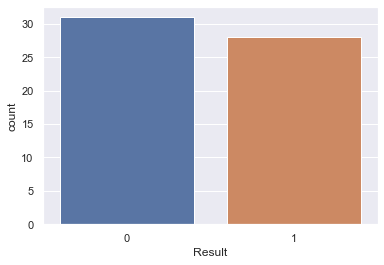

In [19]:
sns.countplot(y)
plt.show()

In [20]:
# describing the data set of the features

X.describe()

,Age,Smokes,AreaQ,Alkhol
count,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288
std,16.235230,7.984607,2.461984,2.380517
min,18.000000,0.000000,1.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000
50%,39.000000,15.000000,5.000000,3.000000
75%,55.000000,20.000000,7.500000,5.000000
max,77.000000,34.000000,10.000000,8.000000


In [21]:
# checking the first few lines of the features data

X.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [22]:
from sklearn.model_selection import train_test_split

# separating the data into train data and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [23]:
# importing the classifiers

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [24]:
# creating a for loop to test classifiers

classifiers = [KNeighborsClassifier(n_neighbors=3), LogisticRegression(), SVC(), LinearSVC(), NuSVC(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    print(classifier)
    print(f"Model Score: {classifier.score(X_test, y_test):.2f}")

KNeighborsClassifier(n_neighbors=3)
Model Score: 1.00
LogisticRegression()
Model Score: 1.00
SVC()
Model Score: 1.00
LinearSVC()
Model Score: 1.00
NuSVC()
Model Score: 1.00
DecisionTreeClassifier()
Model Score: 0.93


C:\Users\Solomon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


RandomForestClassifier()
Model Score: 0.93
AdaBoostClassifier()
Model Score: 0.93
GradientBoostingClassifier()
Model Score: 0.93


In [15]:
# Pick one of the best models

cancer_model = SVC()

# fit the model 

cancer_model.fit(X_train, y_train)

SVC()

In [16]:
# scoring the model

print(f"Training set score: {cancer_model.score(X_train, y_train):.3f}")
print(f"Testing set score: {cancer_model.score(X_test, y_test):.3f}")

Training set score: 0.886
Testing set score: 1.000


In [17]:
# classification report 

from sklearn.metrics import confusion_matrix, classification_report

print(f"The classification report of the model:\n{classification_report(y_test, cancer_model.predict(X_test))}")
print(f"Confusion Matrix of the model:\n{confusion_matrix(y_test, cancer_model.predict(X_test))}")

The classification report of the model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix of the model:
[[10  0]
 [ 0  5]]
